# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [44]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-18 20:45:28--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57.01K  --.-KB/s    in 0.009s  

2022-11-18 20:45:28 (6.08 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [46]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,328,93,43,88,170,66,9,150,45,19,147,164,334,143,65,2,17,196,206
1,813,90,48,77,132,56,10,157,44,20,164,169,354,187,78,1,3,182,191
2,777,106,53,98,154,47,4,237,28,26,164,263,838,222,82,4,17,185,184
3,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
4,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
5,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
6,499,102,54,98,167,53,10,217,31,24,174,228,692,223,72,0,31,187,198
7,65,89,41,75,143,56,7,146,46,19,137,170,317,156,76,18,5,184,188
8,141,81,42,63,125,55,8,149,46,19,145,166,320,172,86,7,7,179,182
9,401,85,37,80,158,59,8,153,44,19,126,179,348,136,69,6,21,191,197


Methods `describe` and `info` deliver some useful information.

In [47]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.109290,93.544627,44.885246,82.327869,169.349727,61.786885,8.726776,168.803279,40.905282,20.579235,148.069217,188.892532,439.296903,174.967213,72.411658,6.469945,12.710383,188.923497,195.657559
std,240.175025,7.843143,6.103094,15.401736,33.926952,8.386649,5.071571,32.908875,7.748684,2.560153,14.380985,31.313713,174.713857,31.884469,7.702849,4.909910,8.862386,6.034691,7.302087
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,227.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,152.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,419.000000,92.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,626.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,115.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [48]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [17]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from scikitplot.metrics import plot_roc

In [19]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs = -1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator=log_reg, param_grid=params, n_jobs=-1)
clf.fit(X_train, y_train)

best_log_reg = clf.best_estimator_
print(best_log_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 285.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_searc

LogisticRegression(C=1.5000000000000002, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   solver='saga', tol=0.001)


In [20]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average='weighted'))

accuracy =  0.797979797979798
f1 =  0.7944437864320858


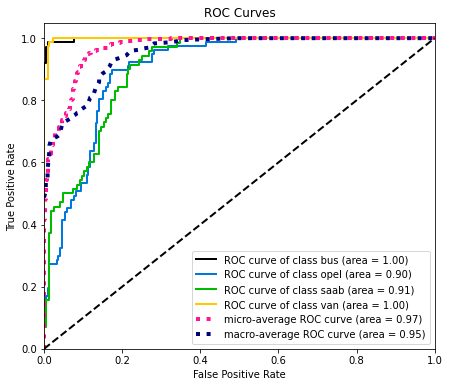

In [21]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba, figsize=(7, 6))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0, 0.5, 'variance ratio')

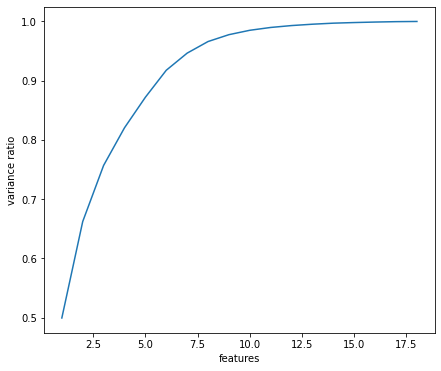

In [23]:
n_components = list(range(1, X_train.shape[1]))

ratio = []
for n in n_components:
    pca = PCA(n)
    pca.fit(X_train)
    ratio.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(7, 6))
plt.plot(n_components, ratio)
plt.xlabel('features')
plt.ylabel('variance ratio')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Из предыдущего графика видно, что ratio после 13-14 фичей перестает расти, с учетом этого возьмем:

In [24]:
pca = PCA(13)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [25]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs=-1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator=log_reg, param_grid=params, n_jobs=-1)
clf.fit(X_train_pca, y_train)

best_log_reg_pca = clf.best_estimator_
print(best_log_reg_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 285.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_searc

LogisticRegression(C=0.4, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.001)


In [26]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average='weighted'))

accuracy =  0.7575757575757576
f1 =  0.7530166265675068


Заметим, что ухудшилось качество модели, но это логично, так как уменьшили размерность пространства признаков.


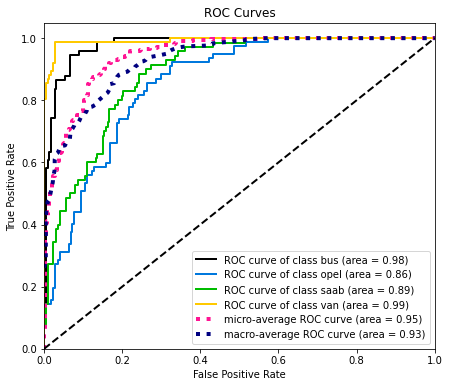

In [27]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba, figsize=(7,6))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

In [29]:
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)
clf.fit(X_train, y_train)

best_tree = clf.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=98)


In [30]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average='weighted'))

accuracy =  0.7306397306397306
f1 =  0.7306785932846286


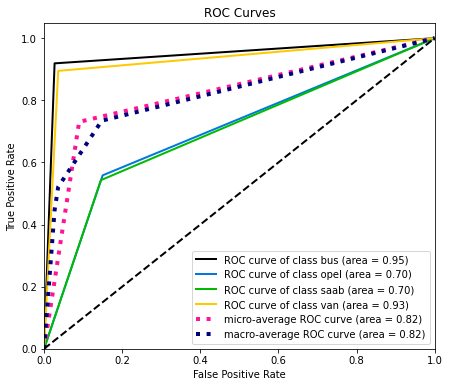

In [31]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba, figsize=(7,6))

До этого обучали на всех признаках, теперь применим pca

In [32]:
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)
clf.fit(X_train_pca, y_train)

best_tree_pca = clf.best_estimator_
print(best_tree_pca)

DecisionTreeClassifier(max_depth=13)


In [33]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average='weighted'))

accuracy =  0.7104377104377104
f1 =  0.7114948446584641


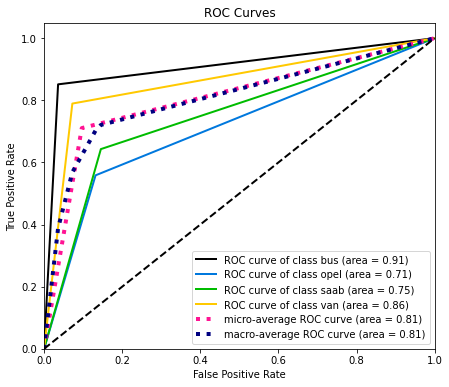

In [34]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba, figsize=(7,6))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [35]:
from sklearn.ensemble import BaggingClassifier

#### logreg

(0.0, 1.0)

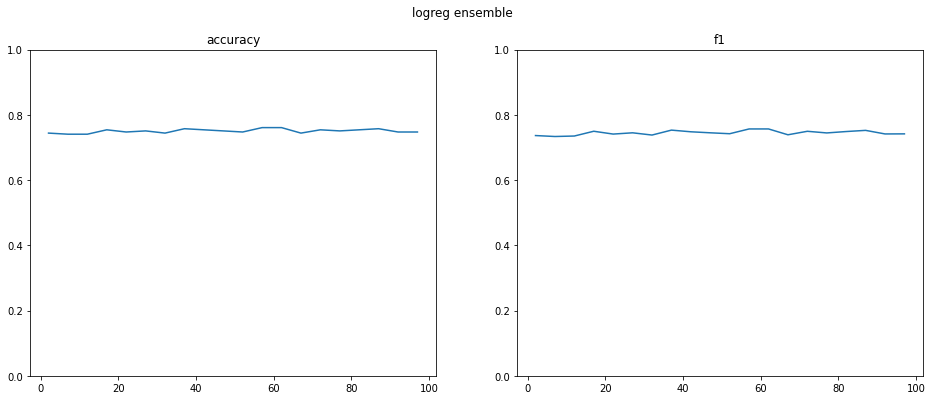

In [36]:
n_algorithms = list(range(2, 100, 5))
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators=n, base_estimator=best_log_reg_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('logreg ensemble')
ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))
ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

#### decision tree

In [37]:
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators=n, base_estimator=best_tree_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

(0.0, 1.0)

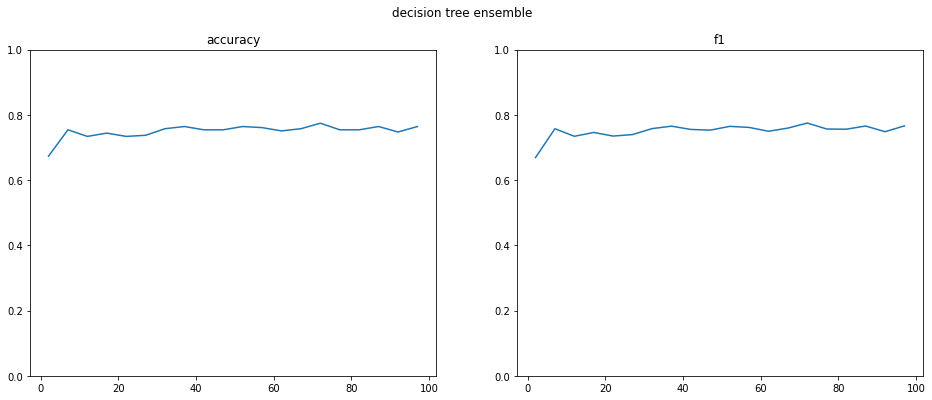

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('decision tree ensemble')
ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))
ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

Воспользуемся найденными оптимальными параметрами, так bagging будет работать лучше

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [39]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [40]:
accuracy = []
f1 = []

for n in n_algorithms:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

Text(0.5, 1.0, 'f1')

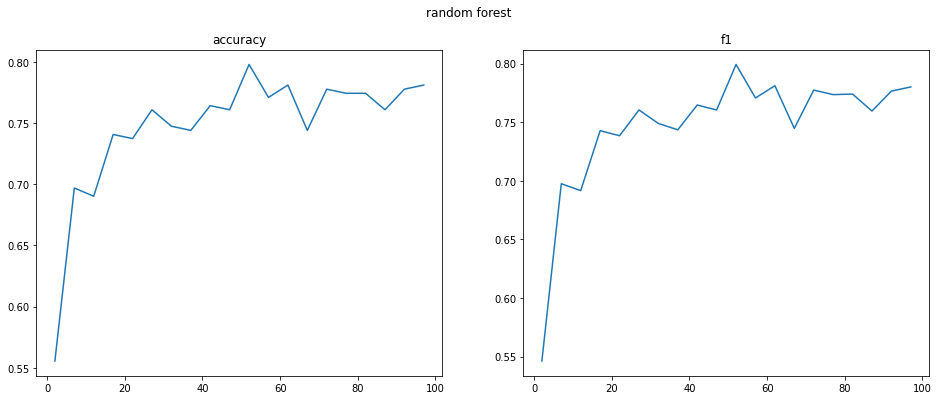

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('random forest')
ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax2.plot(n_algorithms, f1)
ax2.set_title('f1')

Оптимальное количество деревьев для random forest от 15-20 до 100, что отличается от bagging. Мне кажется, что bagging требует большего числа алгоритмов (в нем алгоритмы полностью независимы)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [42]:
part_size = len(X_train) // 10 
models = [best_log_reg_pca, best_tree_pca, RandomForestClassifier(80)]

accuracy_arr = np.zeros((10, 3))
f1_arr = np.zeros((10, 3))

for i in range(10):
    X_train_split = X_train_pca[:min(part_size*(i+1), len(X_train))]
    y_train_split = y_train[:min(part_size*(i+1), len(X_train))]
    
    for m in range(len(models)):
        models[m].fit(X_train_split, y_train_split)
        y_pred = models[m].predict(X_test_pca)
        
        accuracy_arr[i, m] = accuracy_score(y_test, y_pred)
        f1_arr[i, m] = f1_score(y_test, y_pred, average='weighted')

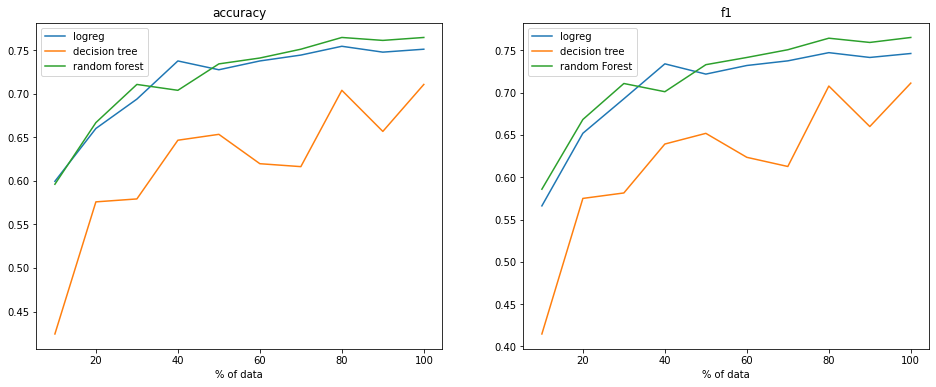

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

part = np.arange(1, 11) * 10

ax1.plot(part, accuracy_arr[:, 0], label='logreg')
ax1.plot(part, accuracy_arr[:, 1], label='decision tree')
ax1.plot(part, accuracy_arr[:, 2], label='random forest')
ax1.set_xlabel('% of data')
ax1.set_title('accuracy')
ax1.legend()

ax2.plot(part, f1_arr[:, 0], label='logreg')
ax2.plot(part, f1_arr[:, 1], label='decision tree')
ax2.plot(part, f1_arr[:, 2], label='random Forest')
ax2.set_xlabel('% of data')
ax2.set_title('f1')
ax2.legend()

Заметим, что сначале качество моделей довольно быстро увеличивается, но затем рост становится не такой большой, и в какой-то момент качество почти перестает изменяться.

Хуже всех показал себя decision tree. logreg и random forest дают похожие результаты и подобно случайной величине то одна модель показывает чуть лучшие результат, то другая.
